In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 85.4 MB/s eta 0:00:00
   ━━━

In [ ]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/Capstone/job_descriptions.csv'
df = pd.read_csv(file_path)

In [ ]:
df

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1.089840e+15,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,3.984540e+14,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,4.816400e+14,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,6.881930e+14,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,1.170580e+14,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1.625560e+15,2 to 9 Years,B.Com,$64K-$127K,Kabul,Afghanistan,33.9391,67.7100,Contract,124090,...,(793)239-9436x05926,Legal Counsel,Employment Lawyer,Stack Overflow Jobs,Employment Lawyers focus on employment law mat...,"{'Tuition Reimbursement, Stock Options or Equi...",Employment law and regulations Employment cont...,"Advise on employment law matters, including la...",Avnet,"{""Sector"":""Technology"",""Industry"":""Wholesalers..."
1048571,1.775320e+15,1 to 14 Years,MCA,$56K-$125K,Kingston,Jamaica,18.1096,-77.2975,Temporary,13257,...,400-322-4217x81341,Electrical Engineer,Electronics Hardware Engineer,Stack Overflow Jobs,Electronics Hardware Engineers develop and des...,"{'Childcare Assistance, Paid Time Off (PTO), R...",Electronics design PCB layout Embedded systems...,Develop electronic hardware components and cir...,AmerisourceBergen,"{""Sector"":""Healthcare"",""Industry"":""Wholesalers..."
1048572,6.524230e+14,3 to 9 Years,BBA,$59K-$123K,Muscat,Oman,21.4735,55.9754,Contract,100130,...,001-656-302-7854x4888,Executive Assistant,Project Coordinator,CareerBuilder,"Project Coordinators assist in planning, execu...","{'Casual Dress Code, Social and Recreational A...",Project management Communication Time manageme...,"Assist in project management activities, such ...",Segro,"{""Sector"":""Real Estate"",""Industry"":""Real Estat..."
1048573,1.428460e+15,3 to 10 Years,MCA,$62K-$119K,Mexico City,Mexico,23.6345,-102

In [ ]:
selected_columns = ['job_title','skills','average_experience','average_salary','industry','continent']
df_selected = df[selected_columns]
df_selected

,job_title,skills,average_experience,average_salary,industry,continent
0,Web Developer,"HTML, CSS, JS, Backend",7.0,86000.0,Web Development,Asia
1,Operations Manager,Skills not found,6.0,82500.0,Operations & Management,Asia
2,Network Engineer,"NetSec, Firewall, Sec, Routing",8.0,78000.0,Networking,Africa
3,Software Tester,Skills not found,8.0,76000.0,Quality Assurance,Europe
4,UX/UI Designer,"UI, Prototyping, Usability, Design",5.0,83500.0,UI/UX Design,Africa
...,...,...,...,...,...,...
309110,Software Tester,Skills not found,5.0,87500.0,Quality Assurance,South America
309111,Technical Writer,"Writing, Content, SEO, Docs",6.0,75000.0,Technical Documentation,Africa
309112,IT Support Specialist,"HW, OS, NetAdmin, Troubleshoot",7.0,76500.0,Technical Support,Asia
309113,UX/UI Designer,"UI, Prototyping, Usability, Design",8.0,82000.0,UI/UX Design,Europe


In [ ]:
print(df.columns)

Index(['experience', 'qualifications', 'salary_range', 'location', 'country',
       'work_type', 'company_size', 'preference', 'job_title', 'skills',
       'company', 'min_experience', 'max_experience', 'average_experience',
       'log_min_experience', 'log_max_experience', 'log_experience',
       'min_salary', 'max_salary', 'average_salary', 'experience_group',
       'salary_category', 'continent', 'industry'],
      dtype='object')


In [ ]:
print(df.columns)

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1048575 non-null  float64
 1   Experience        1048575 non-null  object 
 2   Qualifications    1048575 non-null  object 
 3   Salary Range      1048575 non-null  object 
 4   location          1048575 non-null  object 
 5   Country           1048575 non-null  object 
 6   latitude          1048575 non-null  float64
 7   longitude         1048575 non-null  float64
 8   Work Type         1048575 non-null  object 
 9   Company Size      1048575 non-null  int64  
 10  Job Posting Date  1048575 non-null  object 
 11  Preference        1048575 non-null  object 
 12  Contact Person    1048575 non-null  object 
 13  Contact           1048575 non-null  object 
 14  Job Title         1048575 non-null  object 
 15  Role              1048575 non-null  object 
 16  

In [ ]:
df.isnull().sum()

,0
Job Id,0
Experience,0
Qualifications,0
Salary Range,0
location,0
Country,0
latitude,0
longitude,0
Work Type,0
Company Size,0


In [ ]:
num_rows = df.shape
print(f'Number of rows: {num_rows}')

Number of rows: (1048575, 23)


# Renaming


In [ ]:
df = df.rename(columns={
    'Job Id': 'job_id',
    'Experience': 'experience',
    'Qualifications': 'qualifications',
    'Salary Range': 'salary_range',
    'location': 'location',
    'Country': 'country',
    'latitude': 'latitude',
    'longitude': 'longitude',
    'Work Type': 'work_type',
    'Company Size': 'company_size',
    'Job Posting Date': 'job_posting_date',
    'Preference': 'preference',
    'Contact Person': 'contact_person',
    'Contact': 'contact',
    'Job Title': 'job_title',
    'Role': 'role',
    'Job Portal': 'job_portal',
    'Job Description': 'job_description',
    'Benefits': 'benefits',
    'skills': 'skills',
    'Responsibilities': 'responsibilities',
    'Company': 'company',
    'Company Profile': 'company_profile'
})

df.columns = df.columns.str.replace(' ', '_').str.lower()
print(df.columns)

Index(['job_id', 'experience', 'qualifications', 'salary_range', 'location',
       'country', 'latitude', 'longitude', 'work_type', 'company_size',
       'job_posting_date', 'preference', 'contact_person', 'contact',
       'job_title', 'role', 'job_portal', 'job_description', 'benefits',
       'skills', 'responsibilities', 'company', 'company_profile'],
      dtype='object')


# Filtering out IT jobs

In [ ]:
unique_job_titles = df['job_title'].unique()
print(unique_job_titles)

['Digital Marketing Specialist' 'Web Developer' 'Operations Manager'
 'Network Engineer' 'Event Manager' 'Software Tester' 'Teacher'
 'UX/UI Designer' 'Wedding Planner' 'QA Analyst' 'Litigation Attorney'
 'Mechanical Engineer' 'Network Administrator' 'Account Manager'
 'Brand Manager' 'Social Worker' 'Social Media Coordinator'
 'Email Marketing Specialist' 'HR Generalist' 'Legal Assistant'
 'Nurse Practitioner' 'Account Director' 'Software Engineer'
 'Purchasing Agent' 'Sales Consultant' 'Civil Engineer'
 'Network Security Specialist' 'UI Developer' 'Financial Planner'
 'Event Planner' 'Psychologist' 'Electrical Designer' 'Data Analyst'
 'Technical Writer' 'Tax Consultant' 'Account Executive'
 'Systems Administrator' 'Database Administrator' 'Research Analyst'
 'Data Entry Clerk' 'Registered Nurse' 'Investment Analyst'
 'Speech Therapist' 'Sales Manager' 'Landscape Architect'
 'Key Account Manager' 'UX Researcher' 'Investment Banker'
 'IT Support Specialist' 'Art Director' 'Software De

In [ ]:
selected_job_titles = [
    'Web Developer', 'Network Engineer', 'Software Tester', 'UX/UI Designer',
    'QA Analyst', 'Software Engineer', 'Network Administrator', 'UI Developer',
    'Systems Administrator', 'Database Administrator', 'Technical Writer',
    'Systems Engineer', 'IT Support Specialist', 'Software Developer',
    'Data Engineer', 'Database Developer', 'Procurement Specialist',
    'Operations Manager', 'Network Security Specialist', 'Technical Writer',
    'Procurement Manager', 'Data Analyst', 'Back-End Developer', 'Business Analyst', 'Networking Analyst',
    'Data Scientist', 'IT Administrator', 'IT Manager', 'Java Developer',
    'Network Technician', 'QA Engineer', 'Quality Assurance Analyst', 'SEO Analyst',
    'Software Developer', 'Systems Analyst', 'UX Researcher', 'Web Designer',
    'Data Entry Clerk', 'Financial Analyst', 'Inventory Analyst', 'Investment Analyst',
    'Research Analyst', 'Supply Chain Analyst'
]
df = df[df['job_title'].isin(selected_job_titles)]
print(df.head())

         job_id     experience qualifications salary_range    location  \
1  3.984540e+14  2 to 12 Years            BCA   $56K-$116K    Ashgabat   
2  4.816400e+14  0 to 12 Years            PhD   $61K-$104K       Macao   
3  6.881930e+14  4 to 11 Years            PhD    $65K-$91K  Porto-Novo   
5  1.168310e+14  4 to 12 Years            MCA    $59K-$93K    Brussels   
7  1.498780e+15   2 to 8 Years          M.Com   $65K-$102K  SÃ£o TomÃ©   

                 country  latitude  longitude  work_type  company_size  ...  \
1           Turkmenistan   38.9697    59.5563     Intern        100340  ...   
2       Macao SAR, China   22.1987   113.5439  Temporary         84525  ...   
3                  Benin    9.3077     2.3158  Full-Time        129896  ...   
5                Belgium   50.5039     4.4699  Full-Time         23196  ...   
7  Sao Tome and Principe    0.1864     6.6131   Contract         40558  ...   

                 contact           job_title                       role  \
1    

In [ ]:
df.company_size.dtype

dtype('int64')

In [ ]:
df.experience.dtype

dtype('O')

In [ ]:
print(df['job_title'].value_counts())
print(f"New dataset size: {df.shape}")

job_title
UX/UI Designer                 31667
Software Engineer              17861
Network Engineer               15813
Software Tester                13615
Procurement Manager            13298
Network Administrator          11390
Data Analyst                   11338
Procurement Specialist         11253
Systems Administrator          11225
Operations Manager              9051
UI Developer                    9050
Research Analyst                8855
UX Researcher                   6904
Data Engineer                   6859
Java Developer                  6839
IT Support Specialist           6837
Investment Analyst              6827
Network Security Specialist     6811
Quality Assurance Analyst       6807
QA Analyst                      6768
Technical Writer                6758
Business Analyst                6733
Web Developer                   6732
Financial Analyst               6717
Database Administrator          6652
Data Entry Clerk                4627
IT Manager                  

# Creating new columns min_salary, max_salary, avg_salary

In [ ]:
import pandas as pd

# Remove special characters from salary_range
df['salary_range'] = df['salary_range'].str.replace(r'[$K]', '', regex=True)

# Split salary_range into min and max salary
salary_split = df['salary_range'].str.split('-', expand=True)

df['min_salary'] = pd.to_numeric(salary_split[0], errors='coerce') * 1000
df['max_salary'] = pd.to_numeric(salary_split[1], errors='coerce') * 1000

df = df.dropna(subset=['min_salary', 'max_salary'])

df['average_salary'] = (df['min_salary'] + df['max_salary']) / 2

df['salary_range'] = df['min_salary'].astype(int).astype(str) + ' - ' + df['max_salary'].astype(int).astype(str)

shuffled_df = df.sample(frac=1, random_state=42).reset_index(drop=True)

shuffled_df['numeric_avg_salary'] = shuffled_df['average_salary']

top_job_salaries = shuffled_df.groupby('job_title')['numeric_avg_salary'].mean().nlargest(10)

print(shuffled_df[['job_title', 'min_salary', 'max_salary', 'average_salary', 'salary_range']].head())
print("\nTop 10 Highest Paying Job Titles:\n", top_job_salaries)


                job_title  min_salary  max_salary  average_salary  \
0      Back-End Developer       59000      125000         92000.0   
1  Procurement Specialist       60000      118000         89000.0   
2   Systems Administrator       56000      119000         87500.0   
3         Software Tester       65000       83000         74000.0   
4   Network Administrator       65000       98000         81500.0   

     salary_range  
0  59000 - 125000  
1  60000 - 118000  
2  56000 - 119000  
3   65000 - 83000  
4   65000 - 98000  

Top 10 Highest Paying Job Titles:
 job_title
Operations Manager       82647.607999
Data Engineer            82640.763960
Investment Analyst       82606.488941
UI Developer             82601.712707
IT Administrator         82582.076309
Network Engineer         82568.740909
QA Analyst               82567.080378
Network Administrator    82551.624232
Network Technician       82551.575931
QA Engineer              82544.911504
Name: numeric_avg_salary, dtype: float6

In [ ]:
# Binning average_salary into 3 categories
df['salary_category'] = pd.qcut(df['average_salary'], q=3, labels=['Low', 'Medium', 'High'])

# Redefining Skills

In [ ]:
df_exploded = df.explode('skills')
unique_skills_by_job = df_exploded.groupby('job_title')['skills'].unique().reset_index()

for _, row in unique_skills_by_job.iterrows():
    print(f"Job Title: {row['job_title']}")
    print(f"Unique Skills: {', '.join(row['skills'])}\n")

Job Title: Back-End Developer
Unique Skills: Server-side programming languages (e.g., Java, Python) Database management API development, API design and development RESTful API knowledge Security protocols (OAuth, JWT)

Job Title: Business Analyst
Unique Skills: Business process analysis Requirement gathering Data analysis Communication skills, Data analysis Data modeling Data visualization SQL Data tools (e.g., Tableau), Healthcare industry knowledge Health data analysis HIPAA regulations EMR systems

Job Title: Data Analyst
Unique Skills: Data analysis and visualization tools (e.g., Tableau, Power BI) SQL and database querying Business intelligence concepts Data modeling and reporting Strong analytical and problem-solving skills Data-driven decision-making, Machine learning algorithms and libraries (e.g., scikit-learn, TensorFlow, PyTorch) Statistical analysis and modeling Data preprocessing and cleaning Big data technologies (e.g., Hadoop, Spark) Data visualization Strong programming

In [ ]:
import pandas as pd

# Define the job_skills dictionary
job_skills = {
    "Back-End Developer": ["Server-side", "DB", "API", "Sec"],  # DB = Database, Sec = Security
    "Business Analyst": ["Data", "SQL", "Analysis", "Comm"],  # Comm = Communication
    "Data Analyst": ["Data", "SQL", "Analysis", "Viz"],  # Viz = Visualization
    "Data Engineer": ["DB", "ETL", "BigData", "SQL"],  # DB = Database, ETL = Extract, Transform, Load
    "Data Scientist": ["ML", "Python", "Data", "SQL"],  # ML = Machine Learning
    "Database Administrator": ["SQL", "Sec", "DB", "Backup"],  # Sec = Security, DB = Database
    "Database Developer": ["SQL", "Opt", "NoSQL", "DB"],  # Opt = Optimization, DB = Database
    "Financial Analyst": ["Data", "Analysis", "Excel", "Modeling"],
    "IT Administrator": ["SysAdmin", "NetAdmin", "Sec", "Troubleshooting"],  # SysAdmin = System Administration, NetAdmin = Network Administration
    "IT Manager": ["NetAdmin", "Cloud", "Sec", "Planning"],  # NetAdmin = Network Administration, Sec = Security
    "IT Support Specialist": ["HW", "OS", "NetAdmin", "Troubleshoot"],  # HW = Hardware, OS = Operating Systems
    "Java Developer": ["Java", "API", "Backend", "Spring"],  # Spring = Framework for Java
    "Network Administrator": ["NetSec", "Firewall", "Sec", "Routing"],  # NetSec = Network Security
    "Network Engineer": ["NetSec", "Firewall", "Sec", "Routing"],  # NetSec = Network Security
    "Network Security Specialist": ["Incident", "PenTest", "Sec", "Firewall"],  # PenTest = Penetration Testing, Sec = Security
    "Network Technician": ["NetSec", "Firewall", "Sec", "Troubleshoot"],  # NetSec = Network Security
    "Software Developer": ["API", "Backend", "DB", "Frameworks"],  # DB = Database
    "Software Engineer": ["Backend", "API", "DB", "Server"],  # DB = Database, Server = Server-Side Development
    "Web Designer": ["HTML", "CSS", "UI", "Responsive"],  # UI = User Interface
    "Web Developer": ["HTML", "CSS", "JS", "Backend"],  # JS = JavaScript
    "QA Analyst": ["TestAutomation", "Selenium", "PerfTest", "Regression"],  # PerfTest = Performance Testing
    "QA Engineer": ["QA", "ProcessImprovement", "Testing", "Automation"],  # QA = Quality Assurance
    "Quality Assurance Analyst": ["TestAutomation", "Selenium", "Regression", "TestCase"],  # TestCase = Test Case Design
    "Research Analyst": ["Data", "Analysis", "Research", "StatSoftware"],  # StatSoftware = Statistical Software
    "SEO Analyst": ["SEO", "ContentStrategy", "Keyword", "Analytics"],  # SEO = Search Engine Optimization
    "Systems Administrator": ["SysAdmin", "Sec", "DB", "Backup"],  # SysAdmin = System Administration
    "Systems Analyst": ["SysAnalysis", "Troubleshoot", "Support", "Docs"],  # Docs = Documentation
    "Systems Engineer": ["Cloud", "Automation", "Sec", "Integration"],  # Sec = Security
    "Technical Writer": ["Writing", "Content", "SEO", "Docs"],  # SEO = Search Engine Optimization
    "UI Developer": ["Frontend", "HTML", "JS", "Responsive"],  # JS = JavaScript
    "UX Researcher": ["Usability", "UserResearch", "DataAnalysis", "UXDesign"],  # UXDesign = User Experience Design
    "UX/UI Designer": ["UI", "Prototyping", "Usability", "Design"],  # UI = User Interface
}

df['skills'] = df['job_title'].apply(lambda title: ', '.join(job_skills.get(title, ["Skills not found"])))

print(df.head())

         job_id experience qualifications    salary_range    location  \
1  3.984540e+14    2 to 12            BCA  56000 - 116000    Ashgabat   
2  4.816400e+14    0 to 12            PhD  61000 - 104000       Macao   
3  6.881930e+14    4 to 11            PhD   65000 - 91000  Porto-Novo   
5  1.168310e+14    4 to 12            MCA   59000 - 93000    Brussels   
7  1.498780e+15     2 to 8          M.Com  65000 - 102000  SÃ£o TomÃ©   

                 country  latitude  longitude  work_type  company_size  ...  \
1           Turkmenistan   38.9697    59.5563     Intern        100340  ...   
2       Macao SAR, China   22.1987   113.5439  Temporary         84525  ...   
3                  Benin    9.3077     2.3158  Full-Time        129896  ...   
5                Belgium   50.5039     4.4699  Full-Time         23196  ...   
7  Sao Tome and Principe    0.1864     6.6131   Contract         40558  ...   

                                     company_profile min_experience  \
1  {"Sector":"F

# Creating experience using range value

In [ ]:
unique_experience_values = df['experience'].unique()
print("Unique experience levels:")
print(unique_experience_values)

Unique experience levels:
['2 to 12 Years' '0 to 12 Years' '4 to 11 Years' '4 to 12 Years'
 '2 to 8 Years' '2 to 9 Years' '3 to 10 Years' '1 to 8 Years'
 '2 to 14 Years' '2 to 10 Years' '0 to 8 Years' '5 to 10 Years'
 '2 to 13 Years' '1 to 15 Years' '3 to 9 Years' '4 to 8 Years'
 '4 to 14 Years' '0 to 11 Years' '4 to 13 Years' '0 to 9 Years'
 '5 to 8 Years' '5 to 14 Years' '1 to 9 Years' '1 to 10 Years'
 '2 to 15 Years' '1 to 14 Years' '5 to 15 Years' '0 to 13 Years'
 '5 to 13 Years' '3 to 8 Years' '1 to 11 Years' '0 to 14 Years'
 '1 to 13 Years' '2 to 11 Years' '3 to 12 Years' '3 to 14 Years'
 '3 to 13 Years' '3 to 11 Years' '3 to 15 Years' '5 to 9 Years'
 '1 to 12 Years' '4 to 15 Years' '4 to 10 Years' '5 to 12 Years'
 '4 to 9 Years' '5 to 11 Years' '0 to 10 Years' '0 to 15 Years']


In [ ]:
df['experience'] = df['experience'].str.replace('Years', '').str.strip()
experience_split = df['experience'].str.split(' to ', expand=True)
df['min_experience'] = pd.to_numeric(experience_split[0], errors='coerce')
df['max_experience'] = pd.to_numeric(experience_split[1], errors='coerce')

df['average_experience'] = ((df['min_experience'] + df['max_experience']) / 2).round()

df['log_min_experience'] = np.log1p(df['min_experience'])
df['log_max_experience'] = np.log1p(df['max_experience'])
df['log_experience'] = np.log1p(df['average_experience'])

print(df[['experience', 'min_experience', 'max_experience', 'average_experience',
          'log_min_experience', 'log_max_experience', 'log_experience']])

        experience  min_experience  max_experience  average_experience  \
1          2 to 12               2              12                 7.0   
2          0 to 12               0              12                 6.0   
3          4 to 11               4              11                 8.0   
5          4 to 12               4              12                 8.0   
7           2 to 8               2               8                 5.0   
...            ...             ...             ...                 ...   
1048557     2 to 8               2               8                 5.0   
1048558     2 to 9               2               9                 6.0   
1048559    0 to 14               0              14                 7.0   
1048568    5 to 11               5              11                 8.0   
1048573    3 to 10               3              10                 6.0   

         log_min_experience  log_max_experience  log_experience  
1                  1.098612            2.5649

# **Using a different approach to experience by changing it to categories**

In [ ]:
df['experience_group'] = pd.cut(df['average_experience'], bins=[0, 2, 5, 10, 20, np.inf],
                                labels=['Entry (0-2)', 'Junior (3-5)', 'Mid (6-10)', 'Senior (11-20)', 'Expert (20+)'])

# Removing non-standard characters

In [ ]:
unique_experience_values = df['location'].unique()
print("Unique locations:")
print(unique_experience_values)

Unique locations:
['Ashgabat' 'Macao' 'Porto-Novo' 'Brussels' 'SÃ£o TomÃ©' 'Male' 'Manama'
 'Banjul' 'Tegucigalpa' 'Funafuti' 'AsunciÃ³n' 'Noumea' 'Muscat' 'Gaza'
 'Quito' 'Yaounde' 'Moroni' 'Madrid' 'Panama City' 'Yerevan' 'Brazzaville'
 'Mogadishu' 'Castries' 'London' 'Ulaanbaatar' 'San Marino' 'Bratislava'
 'Rabat' 'Bandar Seri Begawan' 'Dhaka' 'Kathmandu' 'Mexico City' 'Moscow'
 'City of Port Louis' 'Papeete' 'San Jose' 'Kigali' 'George Town' 'Tokyo'
 'Seoul' 'Dakar' 'Port Moresby' 'Lusaka' 'Brasilia' 'Kampala'
 'City of Victoria' 'Bangui' 'Washington, D.C.' 'Suva' 'Montevideo'
 'Chisinau' 'Port-au-Prince' 'Berlin' 'Antananarivo' 'Bridgetown'
 'Jakarta' 'Port of Spain' 'Douglas' 'Santo Domingo' 'Conakry' 'Riga'
 'Maseru' 'Gibraltar' 'Budapest' 'Nairobi' 'Baku' 'Juba' 'Dili' 'Dublin'
 'Amman' 'Damascus' 'Accra' 'Bangkok' 'Tashkent' 'Naypyidaw'
 'The City of Hamilton' 'Marigot' 'Bishkek' 'Warsaw' 'Buenos Aires'
 'Harare' 'Phnom Penh' 'Cairo' 'Valletta' 'Basseterre' 'Kingstown'
 'Haga

In [ ]:
# Save the original DataFrame before processing
df_original = df.copy()

df_processed = df.copy()

In [ ]:
import pandas as pd


# Define the mapping of cities to countries
city_to_country = {
    'Ashgabat': 'Turkmenistan', "Saint John's":'Antigua and Barbuda', 'Macao': 'China', 'Porto-Novo': 'Benin', 'Brussels': 'Belgium',
    'SÃ£o TomÃ©': 'Sao Tome and Principe', 'Male': 'Maldives', 'Manama': 'Bahrain', 'Banjul': 'Gambia',
    'Tegucigalpa': 'Honduras', 'Funafuti': 'Tuvalu', 'AsunciÃ³n': 'Paraguay', 'Noumea': 'New Caledonia',
    'Muscat': 'Oman', 'Gaza': 'Palestine', 'Quito': 'Ecuador', 'Yaounde': 'Cameroon', 'Moroni': 'Comoros',
    'Madrid': 'Spain', 'Panama City': 'Panama', 'Yerevan': 'Armenia', 'Brazzaville': 'Congo', 'Mogadishu': 'Somalia',
    'Castries': 'Saint Lucia', 'London': 'United Kingdom', 'Ulaanbaatar': 'Mongolia', 'San Marino': 'San Marino',
    'Bratislava': 'Slovakia', 'Rabat': 'Morocco', 'Bandar Seri Begawan': 'Brunei', 'Dhaka': 'Bangladesh',
    'Kathmandu': 'Nepal', 'Mexico City': 'Mexico', 'Moscow': 'Russia', 'City of Port Louis': 'Mauritius',
    'Papeete': 'French Polynesia', 'San Jose': 'Costa Rica', 'Kigali': 'Rwanda', 'George Town': 'Cayman Islands',
    'Tokyo': 'Japan', 'Seoul': 'South Korea', 'Dakar': 'Senegal', 'Port Moresby': 'Papua New Guinea',
    'Lusaka': 'Zambia', 'Brasilia': 'Brazil', 'Kampala': 'Uganda', 'City of Victoria': 'Seychelles', 'Bangui': 'Central African Republic',
    'Washington, D.C.': 'United States', 'Suva': 'Fiji', 'Montevideo': 'Uruguay', 'Chisinau': 'Moldova',
    'Port-au-Prince': 'Haiti', 'Berlin': 'Germany', 'Antananarivo': 'Madagascar', 'Bridgetown': 'Barbados',
    'Jakarta': 'Indonesia', 'Port of Spain': 'Trinidad and Tobago', 'Douglas': 'Isle of Man', 'Santo Domingo': 'Dominican Republic',
    'Conakry': 'Guinea', 'Riga': 'Latvia', 'Maseru': 'Lesotho', 'Gibraltar': 'Gibraltar', 'Budapest': 'Hungary',
    'Nairobi': 'Kenya', 'Baku': 'Azerbaijan', 'Juba': 'South Sudan', 'Dili': 'East Timor', 'Dublin': 'Ireland',
    'Amman': 'Jordan', 'Damascus': 'Syria', 'Accra': 'Ghana', 'Bangkok': 'Thailand', 'Tashkent': 'Uzbekistan',
    'Naypyidaw': 'Myanmar', 'The City of Hamilton': 'Bermuda', 'Marigot': 'Saint Martin', 'Bishkek': 'Kyrgyzstan',
    'Warsaw': 'Poland', 'Buenos Aires': 'Argentina', 'Harare': 'Zimbabwe', 'Phnom Penh': 'Cambodia',
    'Cairo': 'Egypt', 'Valletta': 'Malta', 'Basseterre': 'Saint Kitts and Nevis', 'Kingstown': 'Saint Vincent and the Grenadines',
    'Hagatna': 'Guam', 'Freetown': 'Sierra Leone', 'Pretoria': 'South Africa', 'Oslo': 'Norway', 'Libreville': 'Gabon',
    'Honiara': 'Solomon Islands', 'Nouakchott': 'Mauritania', 'Doha': 'Qatar', 'Guatemala City': 'Guatemala',
    'Santiago': 'Chile', 'Paramaribo': 'Suriname', 'Willemstad': 'Curaçao', 'Sofia': 'Bulgaria', 'Apia': 'Samoa',
    'Georgetown': 'Guyana', 'Kinshasa': 'Democratic Republic of the Congo', 'Canberra': 'Australia', 'Paris': 'France',
    'Andorra la Vella': 'Andorra', 'San Salvador': 'El Salvador', 'Helsinki': 'Finland', 'Copenhagen': 'Denmark',
    'Gitega': 'Burundi', 'Bamako': 'Mali', 'Charlotte Amalie': 'U.S. Virgin Islands', 'Saint George\'s': 'Grenada',
    'Vientiane': 'Laos', 'Bern': 'Switzerland', 'Minsk': 'Belarus', 'ReykjavÃ­k': 'Iceland', 'Abuja': 'Nigeria',
    'Niamey': 'Niger', 'Nuuk': 'Greenland', 'Kingston': 'Jamaica', 'Bissau': 'Guinea-Bissau', 'Sarajevo': 'Bosnia and Herzegovina',
    'Kabul': 'Afghanistan', 'Athens': 'Greece', 'LomÃ©': 'Togo', 'Maputo': 'Mozambique', 'Zagreb': 'Croatia',
    'Islamabad': 'Pakistan', 'Vaduz': 'Liechtenstein', 'Cockburn Town': 'Turks and Caicos Islands', 'Pristina': 'Kosovo',
    'Caracas': 'Venezuela', 'Roseau': 'Dominica', 'Managua': 'Nicaragua', 'Havana': 'Cuba', 'Windhoek': 'Namibia',
    'Malabo (de jure),': 'Equatorial Guinea', 'Philipsburg': 'Sint Maarten', 'Mbabane': 'Eswatini', 'Road Town': 'British Virgin Islands',
    'Luanda': 'Angola', 'Port Vila': 'Vanuatu', 'Podgorica': 'Montenegro', 'Vilnius': 'Lithuania', 'Tallinn': 'Estonia',
    'Dushanbe': 'Tajikistan', 'Asmara': 'Eritrea', 'Jerusalem': 'Israel', 'Kuwait City': 'Kuwait', 'Tehran': 'Iran',
    'Wellington': 'New Zealand', 'Tbilisi': 'Georgia', 'Ouagadougou': 'Burkina Faso', 'Algiers': 'Algeria',
    'Kuala Lumpur': 'Malaysia', 'Abu Dhabi': 'United Arab Emirates', 'Addis Ababa': 'Ethiopia', 'Riyadh': 'Saudi Arabia',
    'Praia': 'Cape Verde', 'Nassau': 'Bahamas', 'Monaco': 'Monaco', 'Thimphu': 'Bhutan', 'Victoria': 'Seychelles',
    'Tirana': 'Albania', 'Tripoli': 'Libya', 'Beirut': 'Lebanon', 'Belmopan': 'Belize', 'Singapore': 'Singapore',
    'Hanoi': 'Vietnam', 'Belgrade': 'Serbia', 'Amsterdam': 'Netherlands', 'Lilongwe': 'Malawi',
    'Khartoum': 'Sudan', 'Vienna': 'Austria', 'Tunis': 'Tunisia', 'City of Baghdad': 'Iraq', 'Lisbon': 'Portugal',
    'Skopje': 'North Macedonia', 'Yaren District (de facto)': 'Nauru', 'Ljubljana': 'Slovenia', 'Ottawa': 'Canada',
    'Sri Jayawardenepura Kotte': 'Sri Lanka', 'San Juan': 'Puerto Rico', 'Nur-Sultan': 'Kazakhstan', 'Nicosia': 'Cyprus',
    'Prague': 'Czech Republic', 'Majuro': 'Marshall Islands', 'Bucharest': 'Romania', 'Manila': 'Philippines',
    'Tarawa': 'Kiribati', 'Kyiv (also known as Kiev)': 'Ukraine', 'Djibouti (city)': 'Djibouti', 'Dodoma': 'Tanzania',
    'BogotÃ¡': 'Colombia', 'Sucre (de jure)': 'Bolivia', 'New Delhi': 'India', 'Yamoussoukro': 'Ivory Coast',
    'Nuku?alofa': 'Tonga', 'Torshavn': 'Faroe Islands', 'Capitol Hill, Saipan': 'Northern Mariana Islands',
    'Monrovia': 'Liberia', 'Gaborone': 'Botswana', 'Oranjestad': 'Aruba', 'Ankara': 'Turkey', 'Rome': 'Italy',
    'Palikir': 'Micronesia', 'Sanaa': 'Yemen', "N'Djamena": 'Chad', 'Beijing': 'China', 'Lima': 'Peru',
    'Luxembourg': 'Luxembourg', 'Stockholm': 'Sweden', 'Ngerulmud': 'Palau'
}

import pandas as pd

country_to_continent = {
    'Ghana': 'Africa', 'Antigua and Barbuda':'North America', 'Cameroon': 'Africa', 'South Africa': 'Africa', 'Nigeria': 'Africa', 'Egypt': 'Africa',
    'Ethiopia': 'Africa', 'Kenya': 'Africa', 'Tanzania': 'Africa', 'Uganda': 'Africa', 'Congo': 'Africa',
    'China': 'Asia', 'India': 'Asia', 'Bangladesh': 'Asia', 'Nepal': 'Asia', 'Pakistan': 'Asia', 'Iran': 'Asia',
    'Thailand': 'Asia', 'Japan': 'Asia', 'Malaysia': 'Asia', 'Indonesia': 'Asia',
    'France': 'Europe', 'Germany': 'Europe', 'United Kingdom': 'Europe', 'Italy': 'Europe', 'Spain': 'Europe',
    'Russia': 'Europe', 'Poland': 'Europe', 'Ukraine': 'Europe', 'Belgium': 'Europe', 'Netherlands': 'Europe',
    'United States': 'North America', 'Canada': 'North America', 'Mexico': 'North America', 'Cuba': 'North America',
    'Argentina': 'South America', 'Brazil': 'South America', 'Chile': 'South America', 'Peru': 'South America',
    'Colombia': 'South America', 'Venezuela': 'South America',
    'Australia': 'Oceania', 'New Zealand': 'Oceania', 'Fiji': 'Oceania', 'Samoa': 'Oceania',
    'Panama': 'Central America', 'Costa Rica': 'Central America', 'Guatemala': 'Central America',
    'Turkmenistan': 'Asia', 'Benin': 'Africa', 'Sao Tome and Principe': 'Africa', 'Maldives': 'Asia', 'Bahrain': 'Asia',
    'Gambia': 'Africa', 'Honduras': 'Central America', 'Tuvalu': 'Oceania', 'Paraguay': 'South America', 'New Caledonia': 'Oceania',
    'Oman': 'Asia', 'Palestine': 'Asia', 'Ecuador': 'South America', 'Comoros': 'Africa', 'Armenia': 'Asia', 'Somalia': 'Africa',
    'Saint Lucia': 'North America', 'Mongolia': 'Asia', 'San Marino': 'Europe', 'Slovakia': 'Europe', 'Morocco': 'Africa',
    'Brunei': 'Asia', 'Mauritius': 'Africa', 'French Polynesia': 'Oceania', 'Rwanda': 'Africa', 'Cayman Islands': 'North America',
    'South Korea': 'Asia', 'Senegal': 'Africa', 'Papua New Guinea': 'Oceania', 'Zambia': 'Africa', 'Seychelles': 'Africa',
    'Central African Republic': 'Africa', 'Uruguay': 'South America', 'Moldova': 'Europe', 'Haiti': 'North America',
    'Madagascar': 'Africa', 'Barbados': 'North America', 'Trinidad and Tobago': 'North America', 'Isle of Man': 'Europe',
    'Dominican Republic': 'North America', 'Guinea': 'Africa', 'Latvia': 'Europe', 'Lesotho': 'Africa', 'Gibraltar': 'Europe',
    'Hungary': 'Europe', 'Azerbaijan': 'Asia', 'South Sudan': 'Africa', 'East Timor': 'Asia', 'Ireland': 'Europe', 'Jordan': 'Asia',
    'Syria': 'Asia', 'Uzbekistan': 'Asia', 'Myanmar': 'Asia', 'Bermuda': 'North America', 'Saint Martin': 'North America',
    'Kyrgyzstan': 'Asia', 'Zimbabwe': 'Africa', 'Cambodia': 'Asia', 'Malta': 'Europe', 'Saint Kitts and Nevis': 'North America',
    'Saint Vincent and the Grenadines': 'North America', 'Guam': 'Oceania', 'Sierra Leone': 'Africa', 'Norway': 'Europe',
    'Gabon': 'Africa', 'Solomon Islands': 'Oceania', 'Mauritania': 'Africa', 'Qatar': 'Asia', 'Suriname': 'South America',
    'Curaçao': 'South America', 'Bulgaria': 'Europe', 'Guyana': 'South America', 'Democratic Republic of the Congo': 'Africa',
    'Unknown': 'Unknown', 'Andorra': 'Europe', 'El Salvador': 'North America', 'Finland': 'Europe', 'Denmark': 'Europe',
    'Burundi': 'Africa', 'Mali': 'Africa', 'U.S. Virgin Islands': 'North America', 'Grenada': 'North America', 'Laos': 'Asia',
    'Switzerland': 'Europe', 'Belarus': 'Europe', 'Iceland': 'Europe', 'Niger': 'Africa', 'Greenland': 'North America',
    'Jamaica': 'North America', 'Guinea-Bissau': 'Africa', 'Bosnia and Herzegovina': 'Europe', 'Afghanistan': 'Asia',
    'Greece': 'Europe', 'Togo': 'Africa', 'Mozambique': 'Africa', 'Croatia': 'Europe', 'Liechtenstein': 'Europe',
    'Turks and Caicos Islands': 'North America', 'Kosovo': 'Europe', 'Dominica': 'North America', 'Nicaragua': 'North America',
    'Namibia': 'Africa', 'Equatorial Guinea': 'Africa', 'Sint Maarten': 'North America', 'Eswatini': 'Africa',
    'British Virgin Islands': 'North America', 'Angola': 'Africa', 'Vanuatu': 'Oceania', 'Montenegro': 'Europe', 'Lithuania': 'Europe',
    'Estonia': 'Europe', 'Tajikistan': 'Asia', 'Eritrea': 'Africa', 'Israel': 'Asia', 'Kuwait': 'Asia', 'Georgia': 'Asia',
    'Burkina Faso': 'Africa', 'Algeria': 'Africa', 'United Arab Emirates': 'Asia', 'Saudi Arabia': 'Asia', 'Cape Verde': 'Africa',
    'Bahamas': 'North America', 'Monaco': 'Europe', 'Bhutan': 'Asia', 'Albania': 'Europe', 'Libya': 'Africa', 'Lebanon': 'Asia',
    'Belize': 'North America', 'Singapore': 'Asia', 'Vietnam': 'Asia', 'Serbia': 'Europe', 'Malawi': 'Africa', 'Sudan': 'Africa',
    'Austria': 'Europe', 'Tunisia': 'Africa', 'Iraq': 'Asia', 'Portugal': 'Europe', 'North Macedonia': 'Europe', 'Nauru': 'Oceania',
    'Slovenia': 'Europe', 'Sri Lanka': 'Asia', 'Puerto Rico': 'North America', 'Kazakhstan': 'Asia', 'Cyprus': 'Asia',
    'Czech Republic': 'Europe', 'Marshall Islands': 'Oceania', 'Romania': 'Europe', 'Philippines': 'Asia', 'Kiribati': 'Oceania',
    'Djibouti': 'Africa', 'Bolivia': 'South America', 'Ivory Coast': 'Africa', 'Tonga': 'Oceania', 'Faroe Islands': 'Europe',
    'Northern Mariana Islands': 'Oceania', 'Liberia': 'Africa', 'Botswana': 'Africa', 'Aruba': 'North America', 'Turkey': 'Asia',
    'Micronesia': 'Oceania', 'Yemen': 'Asia', 'Chad': 'Africa', 'Luxembourg': 'Europe', 'Sweden': 'Europe', 'Palau': 'Oceania'
}

def get_country_from_city(city):
    country = city_to_country.get(city)
    if country is None:
        return "Unknown"
    return country

df_processed['country'] = df_processed['location'].apply(get_country_from_city)

df_processed['continent'] = df_processed['country'].apply(get_continent_from_country)

print(df_processed[['location', 'country', 'continent']].head())


     location                country continent
1    Ashgabat           Turkmenistan      Asia
2       Macao       Macao SAR, China   Unknown
3  Porto-Novo                  Benin    Africa
5    Brussels                Belgium    Europe
7  SÃ£o TomÃ©  Sao Tome and Principe    Africa
     location                country continent
1    Ashgabat           Turkmenistan      Asia
2       Macao                  China      Asia
3  Porto-Novo                  Benin    Africa
5    Brussels                Belgium    Europe
7  SÃ£o TomÃ©  Sao Tome and Principe    Africa


In [ ]:
pattern = r'^[a-zA-Z0-9\s,.-]+$'
filtered_df = df_processed[df_processed['location'].str.contains(pattern, na=True)]
filtered_df = filtered_df[filtered_df['country'].str.contains(pattern, na=True)]
# Reset the index if desired
filtered_df.reset_index(drop=True, inplace=True)
print("Rows after removing non-standard characters:", filtered_df.shape)

Rows after removing non-standard characters: (287802, 35)


# Creating a new column Industry

In [ ]:
# Define a mapping for industries based on job titles
job_to_industry = {
    "Back-End Developer": "Software Development",
    "Business Analyst": "Business Intelligence",
    "Data Analyst": "Data Science",
    "Data Engineer": "Data Engineering",
    "Data Scientist": "Data Science",
    "Database Administrator": "Database Management",
    "Database Developer": "Database Management",
    "Financial Analyst": "Finance & Analytics",
    "IT Administrator": "System Administration",
    "IT Manager": "IT Management",
    "IT Support Specialist": "Technical Support",
    "Inventory Analyst": "Operations & Logistics",
    "Investment Analyst": "Finance & Analytics",
    "Java Developer": "Software Development",
    "Network Administrator": "Networking",
    "Network Engineer": "Networking",
    "Network Security Specialist": "Cybersecurity",
    "Network Technician": "Networking",
    "Operations Manager": "Operations & Management",
    "Procurement Manager": "Procurement",
    "Procurement Specialist": "Procurement",
    "QA Analyst": "Quality Assurance",
    "QA Engineer": "Quality Assurance",
    "Quality Assurance Analyst": "Quality Assurance",
    "Research Analyst": "Research & Analysis",
    "SEO Analyst": "Digital Marketing",
    "Software Developer": "Software Development",
    "Software Engineer": "Software Development",
    "Software Tester": "Quality Assurance",
    "Supply Chain Analyst": "Operations & Logistics",
    "Systems Administrator": "System Administration",
    "Systems Analyst": "System Analysis",
    "Systems Engineer": "System Engineering",
    "Technical Writer": "Technical Documentation",
    "UI Developer": "UI/UX Design",
    "UX Researcher": "UI/UX Design",
    "UX/UI Designer": "UI/UX Design",
    "Web Designer": "Web Development",
    "Web Developer": "Web Development",
}

df_processed['industry'] = df_processed['job_title'].map(job_to_industry)
print(df_processed[['job_title', 'industry']].head())

            job_title                 industry
1       Web Developer          Web Development
2  Operations Manager  Operations & Management
3    Network Engineer               Networking
5     Software Tester        Quality Assurance
7      UX/UI Designer             UI/UX Design


In [ ]:
df_processed.columns

Index(['job_id', 'experience', 'qualifications', 'salary_range', 'location',
       'country', 'latitude', 'longitude', 'work_type', 'company_size',
       'job_posting_date', 'preference', 'contact_person', 'contact',
       'job_title', 'role', 'job_portal', 'job_description', 'benefits',
       'skills', 'responsibilities', 'company', 'company_profile',
       'min_experience', 'max_experience', 'average_experience',
       'log_min_experience', 'log_max_experience', 'log_experience',
       'min_salary', 'max_salary', 'average_salary', 'experience_group',
       'salary_category', 'continent', 'industry'],
      dtype='object')

In [ ]:
df_cleaned = df_processed.drop(columns=['job_id','latitude','longitude','job_posting_date','contact_person','role','job_portal','job_description','benefits','responsibilities', 'contact', 'company_profile'])

In [ ]:
df_cleaned.dropna()

,experience,qualifications,salary_range,location,country,work_type,company_size,preference,job_title,skills,...,log_min_experience,log_max_experience,log_experience,min_salary,max_salary,average_salary,experience_group,salary_category,continent,industry
1,2 to 12,BCA,56000 - 116000,Ashgabat,Turkmenistan,Intern,100340,Female,Web Developer,"HTML, CSS, JS, Backend",...,1.098612,2.564949,2.079442,56000,116000,86000.0,Mid (6-10),Medium,Asia,Web Development
2,0 to 12,PhD,61000 - 104000,Macao,China,Temporary,84525,Male,Operations Manager,Skills not found,...,0.000000,2.564949,1.945910,61000,104000,82500.0,Mid (6-10),Medium,Asia,Operations & Management
3,4 to 11,PhD,65000 - 91000,Porto-Novo,Benin,Full-Time,129896,Female,Network Engineer,"NetSec, Firewall, Sec, Routing",...,1.609438,2.484907,2.197225,65000,91000,78000.0,Mid (6-10),Low,Africa,Networking
5,4 to 12,MCA,59000 - 93000,Brussels,Belgium,Full-Time,23196,Male,Software Tester,Skills not found,...,1.609438,2.564949,2.197225,59000,93000,76000.0,Mid (6-10),Low,Europe,Quality Assurance
7,2 to 8,M.Com,65000 - 102000,SÃ£o TomÃ©,Sao Tome and Principe,Contract,40558,Female,UX/UI Designer,"UI, Prototyping, Usability, Design",...,1.098612,2.197225,1.791759,65000,102000,83500.0,Junior (3-5),Medium,Africa,UI/UX Design
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048557,2 to 8,BCA,59000 - 116000,Paramaribo,Suriname,Intern,86326,Female,Software Tester,Skills not found,...,1.098612,2.197225,1.791759,59000,116000,87500.0,Junior (3-5),High,South America,Quality Assurance
1048558,2 to 9,M.Com,57000 - 93000,Asmara,Eritrea,Part-Time,15479,Both,Technical Writer,"Writing, Content, SEO, Docs",...,1.098612,2.302585,1.945910,57000,93000,75000.0,Mid (6-10),Low,Africa,Technical Documentation
1048559,0 to 14,BCA,59000 - 94000,Kuala Lumpur,Malaysia,Part-Time,84348,Male,IT Support Specialist,"HW, OS, NetAdmin, Troubleshoot",...,0.000000,2.708050,2.079442,59000,94000,76500.0,Mid (6-10),Low,Asia,Technical Support
1048568,5 to 11,M.Com,63000 - 101000,Tallinn,Estonia,Intern,126780,Female,UX/UI Designer,"UI, Prototyping, Usability, Design",...,1.791759,2.484907,2.197225,63000,101000,82000.0,Mid (6-10),Medium,Europe,UI/UX Design


In [ ]:
unique_job_titles = df['qualifications'].unique()
print(unique_job_titles)

['BCA' 'PhD' 'MCA' 'M.Com' 'BBA' 'B.Com' 'BA' 'MBA' 'B.Tech' 'M.Tech']


In [ ]:
df_cleaned.to_csv("cleaned_dataset.csv", index=False)
print("File saved as 'cleaned_dataset.csv'")

File saved as 'cleaned_dataset.csv'


In [ ]:
random_sample.to_csv("random_sample.csv", index=False)
print("File saved as 'random_sample.csv'")

File saved as 'random_sample.csv'


In [ ]:
from google.colab import files
files.download("cleaned_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **EDA**

In [ ]:
print(df_cleaned.head())  # Check the first few rows
print(df_cleaned.columns)  # Check column names

      experience qualifications    salary_range    location  \
1  2 to 12 Years            BCA  56000 - 116000    Ashgabat   
2  0 to 12 Years            PhD  61000 - 104000       Macao   
3  4 to 11 Years            PhD   65000 - 91000  Porto-Novo   
5  4 to 12 Years            MCA   59000 - 93000    Brussels   
7   2 to 8 Years          M.Com  65000 - 102000  SÃ£o TomÃ©   

                 country  latitude  longitude  work_type  company_size  \
1           Turkmenistan   38.9697    59.5563     Intern        100340   
2                  China   22.1987   113.5439  Temporary         84525   
3                  Benin    9.3077     2.3158  Full-Time        129896   
5                Belgium   50.5039     4.4699  Full-Time         23196   
7  Sao Tome and Principe    0.1864     6.6131   Contract         40558   

  job_posting_date  ... average_salary min_experience max_experience  \
1       2022-12-19  ...        86000.0              2            2.0   
2       2022-09-14  ...        8

# **Statistical hypothesis**

In [ ]:
uiux_salaries = df_cleaned[df_cleaned['industry'] == 'UI/UX Design']['average_salary']
software_dev_salaries = df_cleaned[df_cleaned['industry'] == 'Software Development']['average_salary']

if uiux_salaries.count() > 0 and software_dev_salaries.count() > 0:
    shapiro_uiux = stats.shapiro(uiux_salaries)
    shapiro_sw = stats.shapiro(software_dev_salaries)
    print(f"Shapiro UI/UX: Statistic = {shapiro_uiux.statistic:.4f}, p-value = {shapiro_uiux.pvalue:.4f}")
    print(f"Shapiro Software Dev: Statistic = {shapiro_sw.statistic:.4f}, p-value = {shapiro_sw.pvalue:.4f}")

    if shapiro_uiux.pvalue > 0.05 and shapiro_sw.pvalue > 0.05:
        test_stat, p_value = stats.ttest_ind(uiux_salaries, software_dev_salaries, equal_var=False)
        test_used = "T-test"
    else:
        test_stat, p_value = stats.mannwhitneyu(uiux_salaries, software_dev_salaries)
        test_used = "Mann-Whitney U Test"

    print(f"\nTest Used: {test_used}")
    print(f"Test Statistic: {test_stat:.4f}, p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Reject the null hypothesis: There is a significant salary difference between UI/UX Design and Software Development.")
    else:
        print("Fail to reject the null hypothesis: No significant salary difference between UI/UX Design and Software Development.")
else:
    print("One or both of the job title groups have no data. Please check your 'job_title' column for accuracy.")


Shapiro UI/UX: Statistic = 0.9667, p-value = 0.0000
Shapiro Software Dev: Statistic = 0.9671, p-value = 0.0000

Test Used: Mann-Whitney U Test
Test Statistic: 13237601.0000, p-value: 0.0230
Reject the null hypothesis: There is a significant salary difference between UI/UX Design and Software Development.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6225.
  res = hypotest_fun_out(*samples, **kwds)


Here,
*   H0: There is no difference in the salary distribution for the two industries: UI/UX design and software development
*   H1: There is difference in the salaries of UI/UX design and software development industries.


1.   Methodology


*   checked for normalities using shapiro wilk test and since p-value returned as 0 it shows that it is not normal
*   Since the data is not normal and a bit right skewed we used Mann-Whitney U test and got a p=-value of 0.02.

Hence rejecting the null hypothesis.

In [ ]:
# Chi-square test for independence between skills and work type
contingency_table = pd.crosstab(random_sample['salary_range'], random_sample['company'])
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)
print(f"Chi2 Stat: {chi2_stat}, P-value: {p_val}")

Chi2 Stat: 497500.42080950446, P-value: 0.21673947260467


Since the p-value is much greater than 0.05, you fail to reject the null hypothesis. This suggests that there is no significant association between the skills and work_type in your dataset, meaning that the distribution of skills is likely independent of the work type.


1.   Chi2 Stat: This is the test statistic that measures the difference between the expected and observed frequencies. A higher Chi-square statistic indicates a greater difference between observed and expected frequencies.


2.   P-value: The p-value is 0.839, which is significantly higher than the commonly used threshold of 0.05.



# Correlation Heatmap

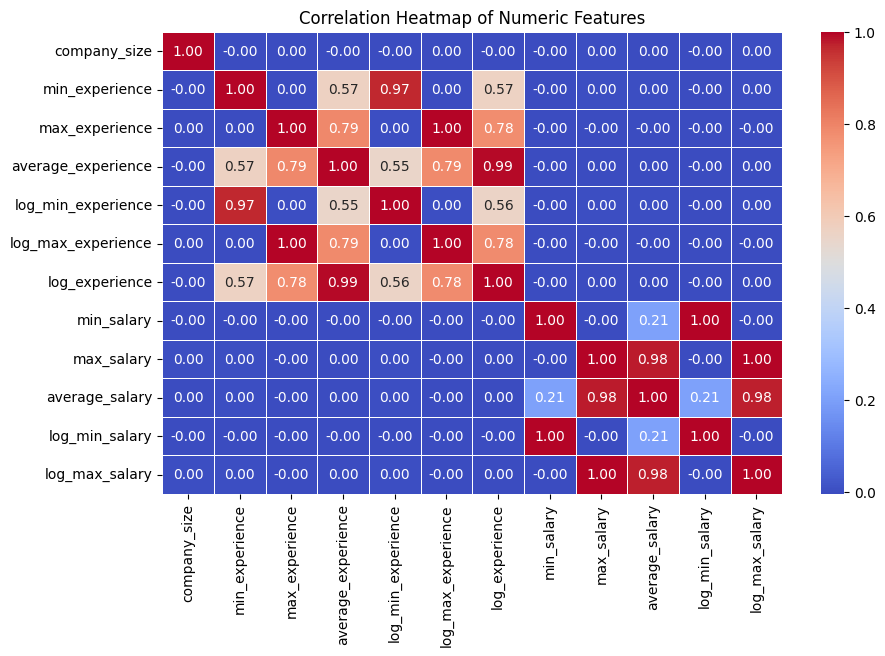

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [ ]:
# Take a random sample of n rows from the dataframe
sample_size = 40000  # Adjust the sample size as needed
random_sample = df.sample(n=sample_size, random_state=42)  # random_state ensures reproducibility

# Display the sample
print(random_sample)

       experience qualifications    salary_range          location  \
168750    1 to 12            PhD  59000 - 125000         New Delhi   
237920    3 to 12            PhD  60000 - 118000            Manila   
246261    4 to 14         M.Tech  56000 - 119000             Tokyo   
98876     5 to 12            BBA   65000 - 83000              Riga   
123450     5 to 9            BBA   65000 - 98000  Charlotte Amalie   
...           ...            ...             ...               ...   
162722    3 to 12            BCA  63000 - 129000          Santiago   
298148    5 to 11            MBA  57000 - 129000   City of Baghdad   
237       4 to 15            MBA  64000 - 127000            Luanda   
259508    0 to 11            MCA  63000 - 110000         Amsterdam   
134317    0 to 12            BBA  57000 - 102000              Male   

                    country  work_type  company_size preference  \
168750                India     Intern         40064       Male   
237920          Philippin

<ipython-input-6-46d4fd4ad58c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_jobs.index, x=top_jobs.values, palette='viridis')


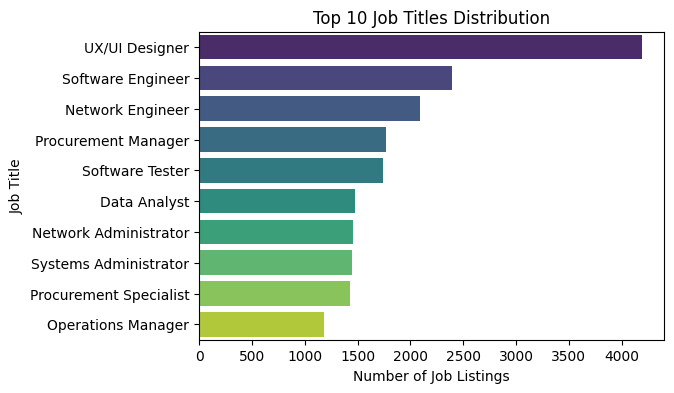

In [ ]:
# Job Title Distribution (Top 10 Job Titles)
plt.figure(figsize=(6, 4))
top_jobs = random_sample['job_title'].value_counts().head(10)
sns.barplot(y=top_jobs.index, x=top_jobs.values, palette='viridis')
plt.title('Top 10 Job Titles Distribution')
plt.xlabel('Number of Job Listings')
plt.ylabel('Job Title')
plt.show()

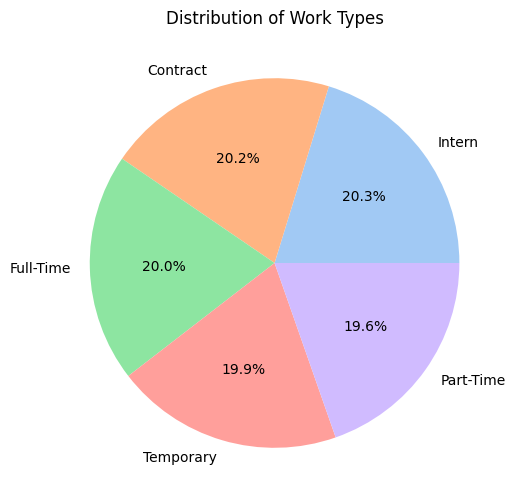

In [ ]:
# Work Type distribution
plt.figure(figsize=(8, 6))
random_sample['work_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Work Types')
plt.ylabel('')
plt.show()

<ipython-input-8-618d1c3ead61>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_job_salaries.values, y=top_job_salaries.index, palette='crest')


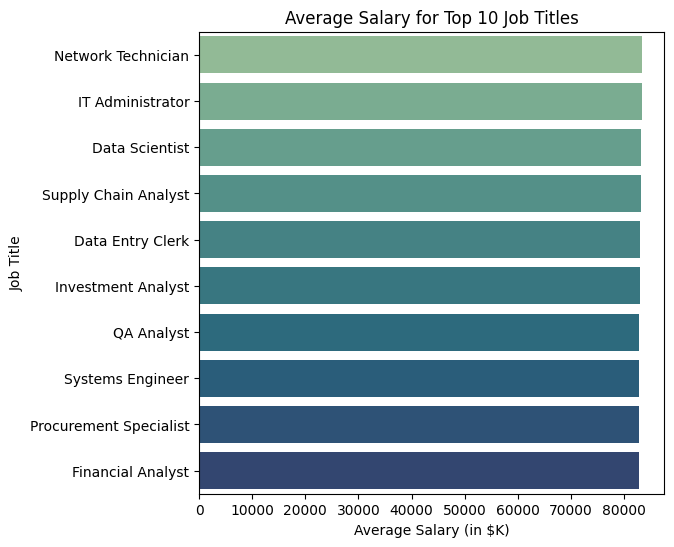

In [ ]:
#  Average Salary Range by Job Title (Top 10 Job Titles)
top_job_salaries = random_sample.groupby('job_title')['average_salary'].mean().nlargest(10)
plt.figure(figsize=(6, 6))
sns.barplot(x=top_job_salaries.values, y=top_job_salaries.index, palette='crest')
plt.title('Average Salary for Top 10 Job Titles')
plt.xlabel('Average Salary (in $K)')
plt.ylabel('Job Title')
plt.show()

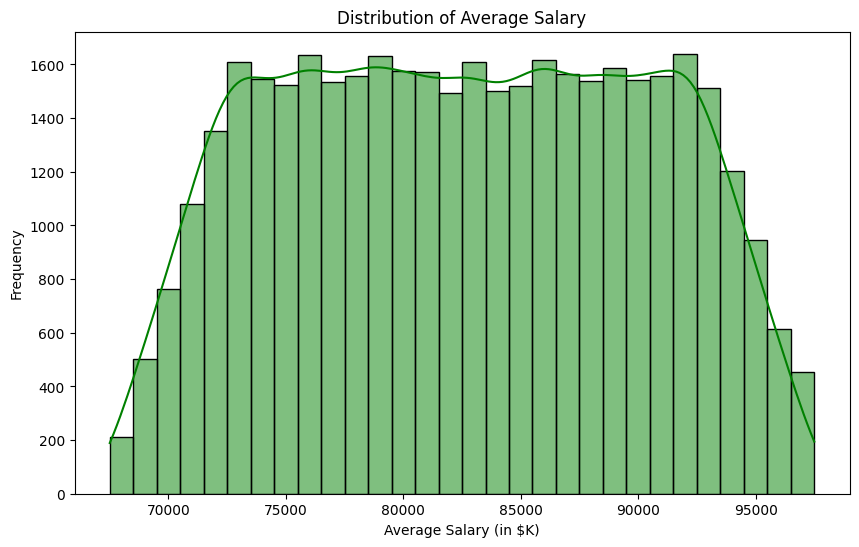

In [ ]:
# Salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(random_sample['average_salary'], bins=30, kde=True, color='green')
plt.title('Distribution of Average Salary')
plt.xlabel('Average Salary (in $K)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-10-d4e98d39c37b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs_salary.values, y=top_jobs_salary.index, palette='coolwarm')


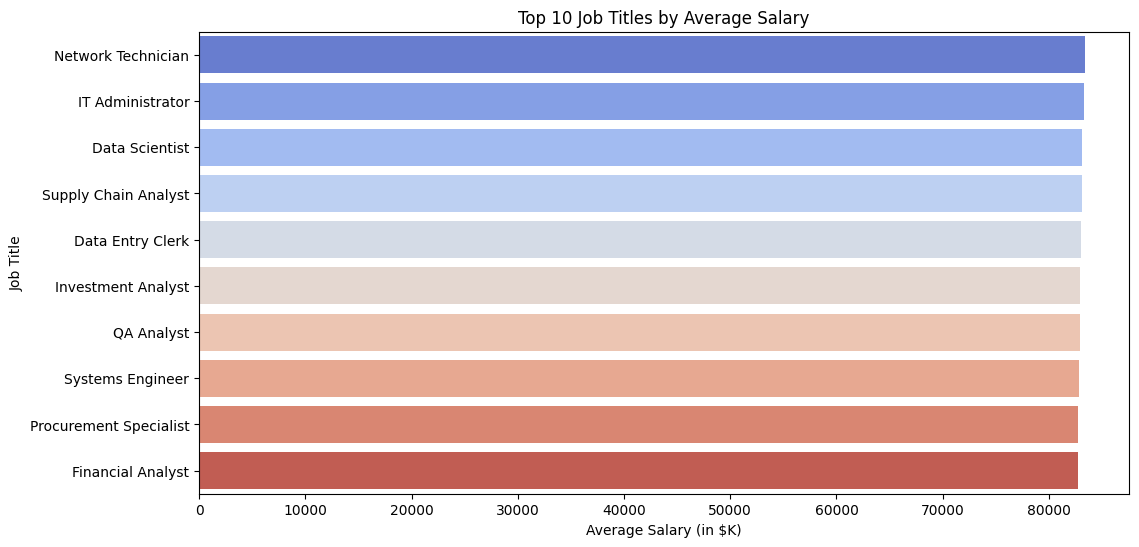

In [ ]:
top_jobs_salary = random_sample.groupby('job_title')['average_salary'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_jobs_salary.values, y=top_jobs_salary.index, palette='coolwarm')
plt.title('Top 10 Job Titles by Average Salary')
plt.xlabel('Average Salary (in $K)')
plt.ylabel('Job Title')
plt.show()

<ipython-input-13-e3a114b94ed3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=work_type_salary.values, y=work_type_salary.index, palette='viridis')


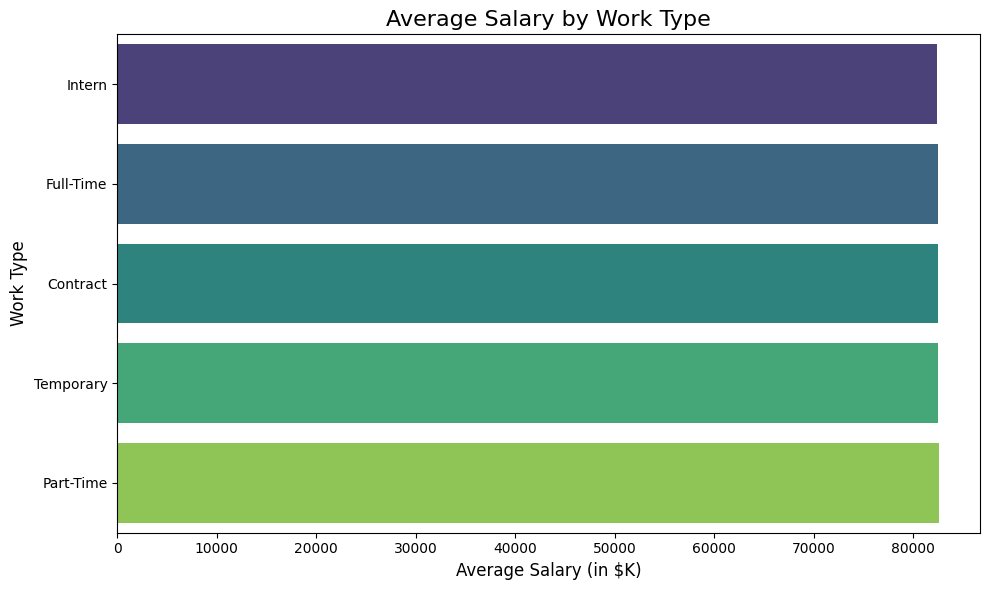

In [ ]:
# Group by work type and calculate average salary
work_type_salary = random_sample.groupby('work_type')['average_salary'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=work_type_salary.values, y=work_type_salary.index, palette='viridis')
plt.title('Average Salary by Work Type', fontsize=16)
plt.xlabel('Average Salary (in $K)', fontsize=12)
plt.ylabel('Work Type', fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-16-60e0fe0e0e2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_salary_numeric.values, y=country_salary_numeric.index, palette='crest')


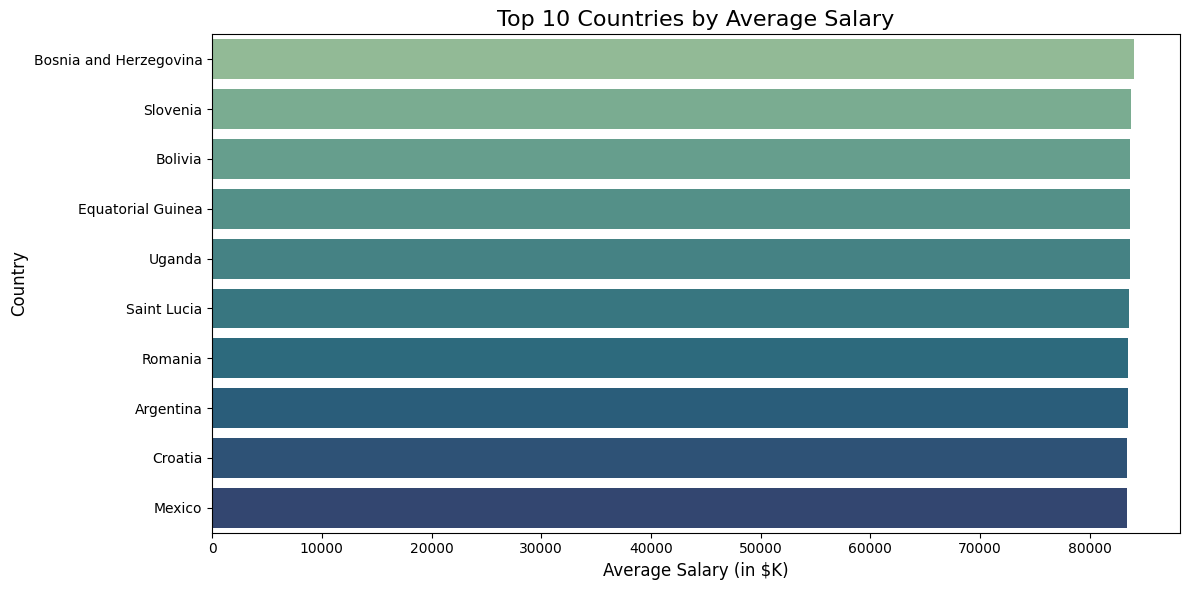

In [ ]:
country_salary_numeric = random_sample.groupby('country')['average_salary'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_salary_numeric.values, y=country_salary_numeric.index, palette='crest')
plt.title('Top 10 Countries by Average Salary', fontsize=16)
plt.xlabel('Average Salary (in $K)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-17-ed779efff116>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='muted')


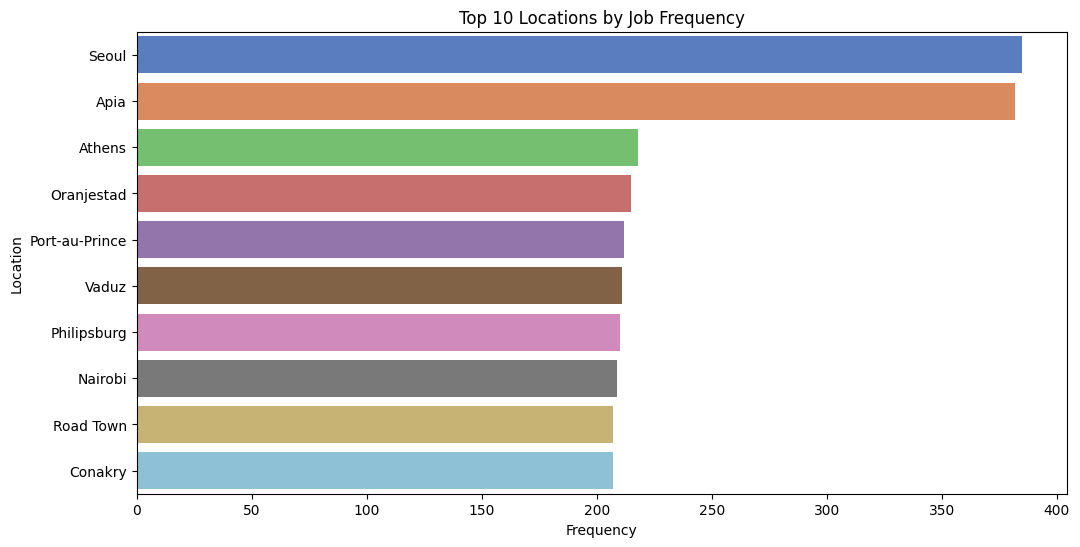

In [ ]:
top_locations = random_sample['location'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='muted')
plt.title('Top 10 Locations by Job Frequency')
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.show()

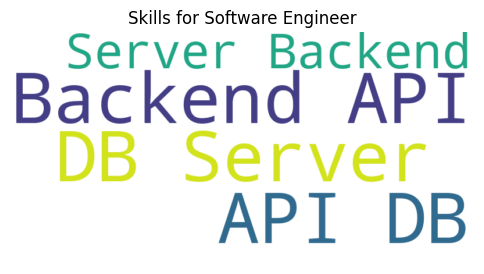

In [ ]:
skills_text = ' '.join(random_sample[random_sample['job_title'] == 'Software Engineer']['skills'].explode())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_text)

plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Skills for Software Engineer')
plt.show()

<ipython-input-19-865516a728ea>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_15, x='average_salary', y='job_title', palette='Blues', showfliers=False)


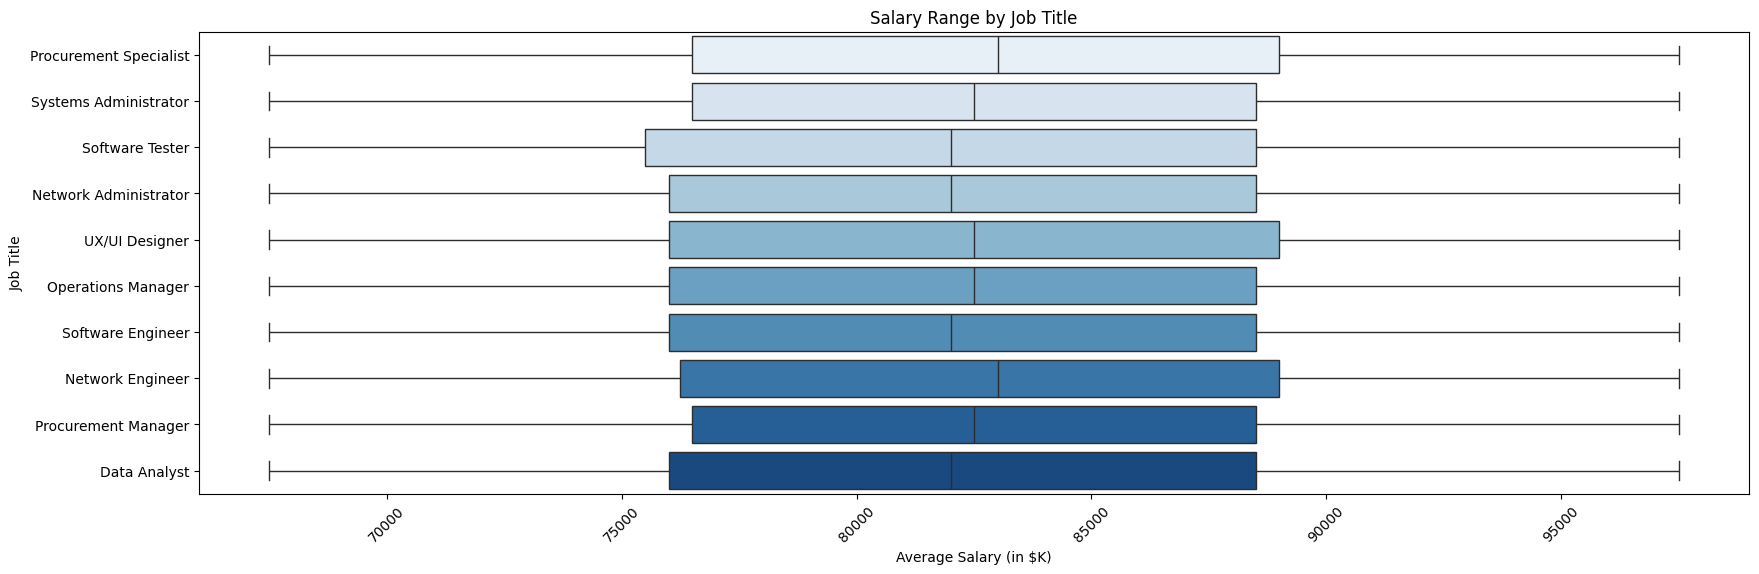

In [ ]:
# Filter the dataset for only the top 15 job titles
top_15_jobs = random_sample['job_title'].value_counts().head(10).index
df_top_15 = random_sample[random_sample['job_title'].isin(top_15_jobs)]

plt.figure(figsize=(20, 6))
sns.boxplot(data=df_top_15, x='average_salary', y='job_title', palette='Blues', showfliers=False)
plt.title('Salary Range by Job Title')
plt.xlabel('Average Salary (in $K)')
plt.ylabel('Job Title')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.columns

Index(['experience', 'qualifications', 'salary_range', 'location', 'country',
       'work_type', 'company_size', 'preference', 'job_title', 'skills',
       'company', 'min_experience', 'max_experience', 'average_experience',
       'log_min_experience', 'log_max_experience', 'log_experience',
       'min_salary', 'max_salary', 'average_salary', 'experience_group',
       'salary_category', 'continent', 'industry', 'log_min_salary',
       'log_max_salary'],
      dtype='object')

# **Scaling**

In [ ]:
import numpy as np

# Apply log transformation
df['log_min_salary'] = np.log1p(df['min_salary'])
df['log_max_salary'] = np.log1p(df['max_salary'])

# Display the updated DataFrame
print(df[['min_salary', 'max_salary', 'log_min_salary', 'log_max_salary']].head())

   min_salary  max_salary  log_min_salary  log_max_salary
0       56000      116000       10.933125       11.661354
1       61000      104000       11.018646       11.552156
2       65000       91000       11.082158       11.418626
3       59000       93000       10.985310       11.440366
4       65000      102000       11.082158       11.532738


In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

# Assuming 'df' is your DataFrame and 'average_salary' is the target variable

# Apply scaling to 'average_salary' before training
scaler = StandardScaler()
df['average_salary_scaled'] = scaler.fit_transform(df[['average_salary']])

# Save the scaler for later use during prediction (to reverse the scaling)
joblib.dump(scaler, 'salary_scaler.pkl')

print("Scaler saved as 'salary_scaler.pkl'")


Scaler saved as 'salary_scaler.pkl'


# **Feature Selection**

In [ ]:
# Take a random sample of n rows from the dataframe
sample_size = 40000  # Adjust the sample size as needed
random_sample = df.sample(n=sample_size, random_state=42)  # random_state ensures reproducibility

# Display the sample
print(random_sample)

       experience qualifications    salary_range          location  \
168750    1 to 12            PhD  59000 - 125000         New Delhi   
237920    3 to 12            PhD  60000 - 118000            Manila   
246261    4 to 14         M.Tech  56000 - 119000             Tokyo   
98876     5 to 12            BBA   65000 - 83000              Riga   
123450     5 to 9            BBA   65000 - 98000  Charlotte Amalie   
...           ...            ...             ...               ...   
162722    3 to 12            BCA  63000 - 129000          Santiago   
298148    5 to 11            MBA  57000 - 129000   City of Baghdad   
237       4 to 15            MBA  64000 - 127000            Luanda   
259508    0 to 11            MCA  63000 - 110000         Amsterdam   
134317    0 to 12            BBA  57000 - 102000              Male   

                    country  work_type  company_size preference  \
168750                India     Intern         40064       Male   
237920          Philippin

# **Encoding skills**

In [ ]:
print(random_sample['skills'].head())

168750         Server-side, DB, API, Sec
237920                  Skills not found
246261         SysAdmin, Sec, DB, Backup
98876                   Skills not found
123450    NetSec, Firewall, Sec, Routing
Name: skills, dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Fill missing values
random_sample['industry'] = random_sample['industry'].fillna("Unknown")
random_sample['skills'] = random_sample['skills'].fillna("Unknown")
random_sample['qualifications'] = random_sample['qualifications'].fillna("Unknown")

# Skill category mapping
skill_category_mapping = {
    'Programming': ['Python', 'Java', 'SQL', 'JavaScript'],
    'Data Analysis': ['Data', 'Analysis', 'Excel', 'Visualization'],
    'Machine Learning': ['ML', 'Deep Learning'],
    'Cloud Technologies': ['Cloud', 'AWS', 'Azure'],
    'Security': ['Sec', 'Firewall', 'NetSec', 'PenTest'],
    'Database': ['DB', 'SQL', 'NoSQL'],
    'Web Development': ['Frontend', 'Backend', 'API', 'HTML', 'CSS'],
    'Software Development': ['Java', 'Python', 'Frameworks'],
    'Automation': ['TestAutomation', 'Selenium', 'Automation'],
    'System Administration': ['SysAdmin', 'NetAdmin', 'Troubleshooting', 'Backup'],
    'Networking': ['Routing', 'Incident', 'PenTest'],
    'Design': ['UXDesign', 'UI', 'Responsive', 'Prototyping'],
    'Others': ['Modeling', 'Research', 'Content', 'Writing', 'SEO']
}

# Categorize skills
def categorize_skills(skill_list):
    return [cat for cat, keywords in skill_category_mapping.items() if any(skill in skill_list for skill in keywords)]

random_sample['skill_category_list'] = random_sample['skills'].apply(lambda x: categorize_skills(x.split(', ')))
random_sample['skill_category_str'] = random_sample['skill_category_list'].apply(lambda x: '|'.join(x))

# Vectorize skills
vectorizer = CountVectorizer(tokenizer=lambda x: x.split('|'), token_pattern=None)

skill_cat_matrix = vectorizer.fit_transform(random_sample['skill_category_str'])
skill_cat_df = pd.DataFrame(skill_cat_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Merge and drop temp columns
random_sample = pd.concat([random_sample.reset_index(drop=True), skill_cat_df], axis=1)
random_sample.drop(['skills', 'skill_category_list', 'skill_category_str'], axis=1, inplace=True)


In [ ]:
job_title_encoding_map = random_sample.groupby('job_title')['average_salary'].mean().to_dict()
qualification_encoding_map = random_sample.groupby('qualifications')['average_salary'].mean().to_dict()

# Set target column
target_column = 'average_salary'

# Target Encoding: job_title
job_title_default = random_sample[target_column].mean()
random_sample['job_title_encoded'] = random_sample['job_title'].map(lambda x: job_title_encoding_map.get(x, job_title_default))

# Target Encoding: qualifications
qual_default = random_sample[target_column].mean()
random_sample['qualification_encoded'] = random_sample['qualifications'].map(lambda x: qualification_encoding_map.get(x, qual_default))

# Save the mappings for later use
joblib.dump(job_title_encoding_map, "job_title_map.pkl")
joblib.dump(qualification_encoding_map, "qualification_map.pkl")

# Drop the original 'job_title' and 'qualifications' columns after encoding
random_sample.drop('job_title', axis=1, inplace=True)
random_sample.drop('qualifications', axis=1, inplace=True)

label_columns = ['experience_group', 'salary_category']
onehot_columns = ['continent', 'preference', 'work_type']

# Apply Label Encoding for ordinal columns
label_encoder = LabelEncoder()
for col in label_columns:
    random_sample[col] = label_encoder.fit_transform(random_sample[col])

# Apply One-Hot Encoding for nominal columns
random_sample = pd.get_dummies(random_sample, columns=onehot_columns, drop_first=True)

random_sample = random_sample.astype({col: int for col in random_sample.select_dtypes(include=['bool']).columns})


In [ ]:
random_sample

,experience,salary_range,location,country,company_size,company,min_experience,max_experience,average_experience,log_min_experience,...,continent_Europe,continent_North America,continent_Oceania,continent_South America,preference_Female,preference_Male,work_type_Full-Time,work_type_Intern,work_type_Part-Time,work_type_Temporary
0,1 to 12,59000 - 125000,New Delhi,India,40064,Tenet Healthcare,1,12,6.0,0.693147,...,0,0,0,0,0,1,0,1,0,0
1,3 to 12,60000 - 118000,Manila,Philippines,96292,Apollo Global Management,3,12,8.0,1.386294,...,0,0,0,0,0,1,0,0,0,1
2,4 to 14,56000 - 119000,Tokyo,Japan,93487,Osram Licht AG (Now part of ams AG),4,14,9.0,1.609438,...,0,0,0,0,1,0,0,0,0,0
3,5 to 12,65000 - 83000,Riga,Latvia,47095,Quest Diagnostics,5,12,8.0,1.791759,...,1,0,0,0,0,1,0,1,0,0
4,5 to 9,65000 - 98000,Charlotte Amalie,U.S. Virgin Islands,99303,KKR,5,9,7.0,1.791759,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,3 to 12,63000 - 129000,Santiago,Chile,62584,Aditya Birla Capital,3,12,8.0,1.386294,...,0,0,0,1,0,1,0,0,0,0
39996,5 to 11,57000 - 129000,City of Baghdad,Iraq,102736,"The Goldman Sachs Group, Inc.",5,11,8.0,1.791759,...,0,0,0,0,0,0,0,0,0,1
39997,4 to 15,64000 - 127000,Luanda,Angola,71638,Regeneron Pharmaceuticals,4,15,10.0,1.609438,...,0,0,0,0,0,1,0,0,0,1
39998,0 to 11,63000 - 110000,Amsterdam,Netherlands,118487,Regions Financial,0,11,6.0,0.000000,...,1,0,0,0,0,1,0,0,0,1


In [ ]:
random_sample.columns

Index(['experience', 'salary_range', 'location', 'country', 'company_size',
       'company', 'min_experience', 'max_experience', 'average_experience',
       'log_min_experience', 'log_max_experience', 'log_experience',
       'min_salary', 'max_salary', 'average_salary', 'experience_group',
       'salary_category', 'industry', 'log_min_salary', 'log_max_salary',
       'average_salary_scaled', '', 'automation', 'cloud technologies',
       'data analysis', 'database', 'design', 'machine learning', 'networking',
       'others', 'programming', 'security', 'software development',
       'system administration', 'web development', 'job_title_encoded',
       'qualification_encoded', 'continent_Asia', 'continent_Central America',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America', 'preference_Female', 'preference_Male',
       'work_type_Full-Time', 'work_type_Intern', 'work_type_Part-Time',
       'work_type_Temporary'],
      dt

In [ ]:
random_sample[['job_title_encoded','log_min_experience','log_min_salary',
       'average_salary_scaled','continent_North America','preference_Female',
       'data analysis','qualification_encoded']].head()


,job_title_encoded,log_min_experience,log_min_salary,average_salary_scaled,continent_North America,preference_Female,data analysis,qualification_encoded
0,81804.607509,0.693147,10.985310,1.262147,0,0,0,82540.956072
1,82747.725682,1.386294,11.002117,0.863330,0,0,0,82540.956072
2,82570.836213,1.609438,10.933125,0.663921,0,1,0,82561.505964
3,82179.369628,1.791759,11.082158,-1.130756,0,0,0,82639.478176
4,82203.983516,1.791759,11.082158,-0.133713,1,0,0,82639.478176


# **Wrapped method**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = random_sample.drop(columns=['average_salary','company','salary_range','experience','location','industry','country','average_salary_scaled'])  # Drop target variable
y = random_sample['average_salary']

model = LinearRegression()

rfe = RFE(model, n_features_to_select=20)

rfe.fit(X, y)

selected_features = X.columns[rfe.support_].tolist()

print("Top selected features using RFE:", selected_features)

X_selected = X[selected_features]

Top selected features using RFE: ['min_experience', 'max_experience', 'average_experience', 'log_min_experience', 'log_max_experience', 'log_experience', 'min_salary', 'max_salary', 'experience_group', 'salary_category', 'log_min_salary', 'log_max_salary', 'average_salary_scaled', 'cloud technologies', 'machine learning', 'networking', 'security', 'software development', 'system administration', 'web development']


# **Embedded method**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = random_sample.drop(columns=['average_salary','company','salary_range','experience','location','country','industry','average_salary_scaled'])  # Drop target variable
y = random_sample['average_salary']

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_25_features = feature_importance_df.head(25)
print("Top 25 features by importance:\n", top_25_features)

Top 25 features by importance:
                     Feature    Importance
8                max_salary  4.598927e-01
12           log_max_salary  4.181854e-01
10          salary_category  8.940942e-02
7                min_salary  1.711381e-02
11           log_min_salary  1.539869e-02
0              company_size  3.494075e-16
27        job_title_encoded  2.253541e-16
28    qualification_encoded  1.013384e-16
2            max_experience  7.500218e-17
5        log_max_experience  7.350028e-17
6            log_experience  7.186512e-17
3        average_experience  6.708224e-17
4        log_min_experience  6.097932e-17
1            min_experience  5.761502e-17
9          experience_group  2.723277e-17
35        preference_Female  1.147331e-17
20               networking  1.143726e-17
38         work_type_Intern  1.098654e-17
22              programming  1.043116e-17
18                   design  1.016246e-17
17                 database  1.003945e-17
14               automation  9.830565e-18
32

In [ ]:
top_25_features

,Feature,Importance
8,max_salary,4.718966e-01
12,log_max_salary,4.061817e-01
10,salary_category,8.940945e-02
7,min_salary,1.690961e-02
11,log_min_salary,1.560269e-02
0,company_size,3.520185e-16
27,job_title_encoded,2.333242e-16
2,max_experience,7.808085e-17
5,log_max_experience,7.547906e-17
3,average_experience,7.543624e-17


# **Model Building**

In [ ]:
random_sample.average_salary

,average_salary
168750,1.262147
237920,0.863330
246261,0.663921
98876,-1.130756
123450,-0.133713
...,...
162722,1.793903
298148,1.395086
237,1.727434
259508,0.530982


In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 84.6 MB/s eta 0:00:00
   ━━━━━

# **Pycaret wrapper**

In [23]:
from pycaret.regression import *
import pandas as pd

# the top features based on previous feature selection (RFE)
selected_features = ['min_experience', 'max_experience', 'average_experience', 'log_min_experience', 'log_max_experience', 'log_experience', 'min_salary', 'experience_group',
                     'salary_category', 'log_min_salary', 'cloud technologies', 'machine learning', 'networking', 'security',
                     'software development', 'system administration', 'web development']

data_for_pycaret = random_sample[selected_features + ['average_salary_scaled']]

data_for_pycaret = data_for_pycaret.dropna(subset=selected_features)

# Compare different models
best_model = compare_models()

print(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2910,0.1158,0.3402,0.8844,0.1903,1.4374,3.2210
ada,AdaBoost Regressor,0.2912,0.1160,0.3406,0.8842,0.1892,1.5263,0.8710
lightgbm,Light Gradient Boosting Machine,0.2919,0.1168,0.3418,0.8834,0.1898,1.5417,1.8290
rf,Random Forest Regressor,0.2968,0.1225,0.3500,0.8777,0.1867,2.1250,16.1410
xgboost,Extreme Gradient Boosting,0.2993,0.1251,0.3536,0.8751,0.1857,2.5544,0.4790
et,Extra Trees Regressor,0.3072,0.1346,0.3668,0.8657,0.1887,2.8529,11.3230
dt,Decision Tree Regressor,0.3916,0.2351,0.4848,0.7652,0.2209,7.9157,0.2550
lr,Linear Regression,0.7644,0.7584,0.8708,0.2428,0.4458,16.1622,0.0510
br,Bayesian Ridge,0.7649,0.7584,0.8708,0.2428,0.4461,16.1167,0.0600
ridge,Ridge Regression,0.7649,0.7584,0.8709,0.2427,0.4461,16.1611,0.0480


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

GradientBoostingRegressor(random_state=42)


# **Pycaret embedded**

In [22]:
from pycaret.regression import *
import pandas as pd

# the top features based on previous feature selection (Embedded method)
selected_features =[
    'salary_category',
    'min_salary',
    'log_min_salary',
    'company_size',
    'job_title_encoded',
    'qualification_encoded',
    'max_experience',
    'log_experience',
    'average_experience',
    'log_min_experience',
    'min_experience',
    'experience_group',
    'preference_Female',
    'networking',
    'work_type_Intern',
    'programming',
    'design',
    'database',
    'automation',
    'continent_North America',
    'others',
    'system administration'
]

data_for_pycaret = random_sample[selected_features + ['average_salary_scaled']]

data_for_pycaret = data_for_pycaret.dropna(subset=selected_features)

exp = setup(data=data_for_pycaret, target='average_salary_scaled', session_id=42)

# Compare different models
best_model = compare_models(n_select=10, sort='R2')

leaderboard = pull()

print(best_model)


,Description,Value
0,Session id,42
1,Target,average_salary_scaled
2,Target type,Regression
3,Original data shape,"(40000, 23)"
4,Transformed data shape,"(40000, 23)"
5,Transformed train set shape,"(28000, 23)"
6,Transformed test set shape,"(12000, 23)"
7,Numeric features,22
8,Preprocess,True
9,Imputation type,simple


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:48:19
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.2968,0.1225,0.3500,0.8777,0.1867,2.1250,15.5700
dt,Decision Tree Regressor,0.3916,0.2351,0.4848,0.7652,0.2209,7.9157,0.4180
lr,Linear Regression,0.7644,0.7584,0.8708,0.2428,0.4458,16.1622,0.0850
br,Bayesian Ridge,0.7649,0.7584,0.8708,0.2428,0.4461,16.1167,0.0560
ridge,Ridge Regression,0.7649,0.7584,0.8709,0.2427,0.4461,16.1611,0.0750
lar,Least Angle Regression,0.7644,0.7586,0.8710,0.2425,0.4458,16.1772,0.0490
huber,Huber Regressor,0.8388,0.9385,0.9683,0.0629,0.5051,6.9448,0.1350
en,Elastic Net,0.8466,0.9566,0.9780,0.0450,0.5122,5.7342,0.0770
lasso,Lasso Regression,0.8466,0.9567,0.9781,0.0449,0.5125,5.7287,0.0750
llar,Lasso Least Angle Regression,0.8466,0.9567,0.9781,0.0449,0.5125,5.7287,0.0470


Processing:   0%|          | 0/90 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2910,0.1158,0.3402,0.8844,0.1903,1.4374,3.1760
ada,AdaBoost Regressor,0.2912,0.1160,0.3406,0.8842,0.1892,1.5263,0.6940
lightgbm,Light Gradient Boosting Machine,0.2919,0.1168,0.3418,0.8834,0.1898,1.5417,2.3720
rf,Random Forest Regressor,0.2968,0.1225,0.3500,0.8777,0.1867,2.1250,15.5700
xgboost,Extreme Gradient Boosting,0.2993,0.1251,0.3536,0.8751,0.1857,2.5544,0.3190
et,Extra Trees Regressor,0.3072,0.1346,0.3668,0.8657,0.1887,2.8529,11.2510
dt,Decision Tree Regressor,0.3916,0.2351,0.4848,0.7652,0.2209,7.9157,0.4180
lr,Linear Regression,0.7644,0.7584,0.8708,0.2428,0.4458,16.1622,0.0850
br,Bayesian Ridge,0.7649,0.7584,0.8708,0.2428,0.4461,16.1167,0.0560
ridge,Ridge Regression,0.7649,0.7584,0.8709,0.2427,0.4461,16.1611,0.0750


[GradientBoostingRegressor(random_state=42), AdaBoostRegressor(random_state=42), LGBMRegressor(n_jobs=-1, random_state=42), RandomForestRegressor(n_jobs=-1, random_state=42), XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...), ExtraTreesRegressor(n_jobs=-1, random_state=42), DecisionTreeRegressor(rando

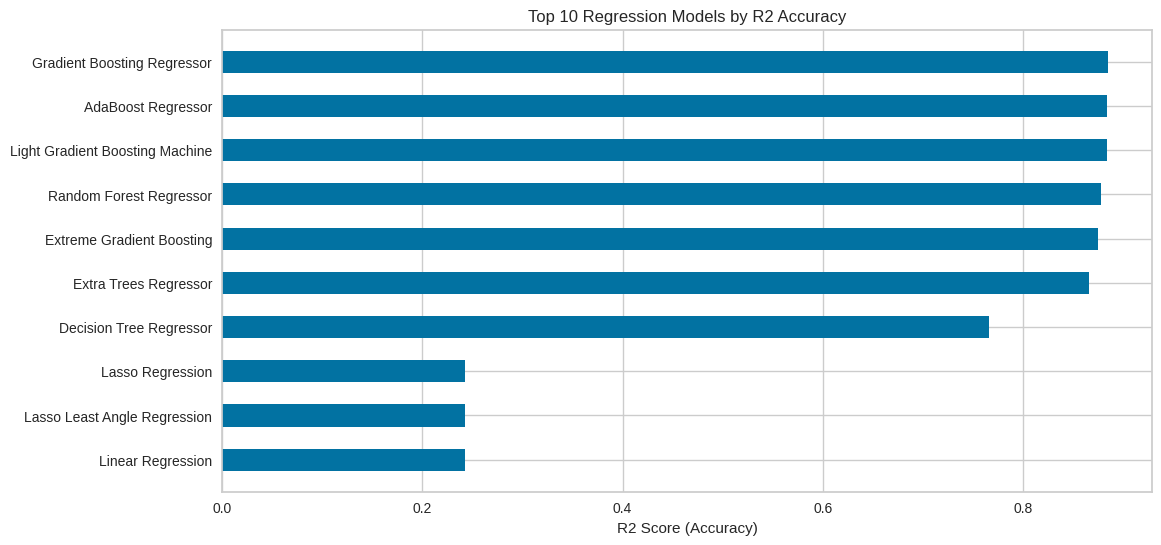

In [ ]:
# Slice only the top 10 rows from the leaderboard
top10_leaderboard = leaderboard.head(10)

# Now plot
plt.figure(figsize=(12, 6))
plt.barh(top10_leaderboard['Model'], top10_leaderboard['R2'], height=0.5)
plt.xlabel('R2 Score (Accuracy)')
plt.title('Top 10 Regression Models by R2 Accuracy')
plt.gca().invert_yaxis()  # highest score on top
plt.grid(True)
plt.show()


# **Gradient Boosting Regressor**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt
import joblib

# Train the model
selected_features = [
    'salary_category',
    'min_salary',
    'log_min_salary',
    'company_size',
    'job_title_encoded',
    'qualification_encoded',
    'max_experience',
    'log_experience',
    'log_min_experience',
    'min_experience',
    'experience_group',
    'preference_Female',
    'networking',
    'work_type_Intern',
    'programming',
    'design',
    'database',
    'automation',
    'continent_North America',
    'others',
    'system administration'
]

# Split the data into training and testing sets
X = random_sample[selected_features]  # Using the selected features
y = random_sample['average_salary_scaled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)

# Fit the model
gbr_model.fit(X_train, y_train)

# Make predictions
y_pred = gbr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Results:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

# Save the model
joblib.dump(gbr_model, "gbr_model.pkl")
print("✅ Model saved as 'gbr_model.pkl'")


Model Evaluation Results:
Mean Absolute Error (MAE): 0.2906568269102332
Mean Squared Error (MSE): 0.11562670263939011
Root Mean Squared Error (RMSE): 0.34003926631992093
R2 Score: 0.8857717937889997
✅ Model saved as 'gbr_model.pkl'


# **Hyper Parameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint, uniform
import numpy as np

# Define the parameter grid
param_distributions = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': uniform(0.6, 0.4),  # values between 0.6 and 1.0
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the model
gbr = GradientBoostingRegressor(random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best estimator and parameters
best_model = random_search.best_estimator_
print("Best Parameters Found:", random_search.best_params_)

# Predict with the tuned model
y_pred_tuned = best_model.predict(X_test)

# Evaluate tuned model
mae = mean_absolute_error(y_test, y_pred_tuned)
mse = mean_squared_error(y_test, y_pred_tuned)
rmse = mean_squared_error(y_test, y_pred_tuned, squared=False)
r2 = r2_score(y_test, y_pred_tuned)

print("\nTuned Model Evaluation Results:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters Found: {'learning_rate': 0.05184815819561255, 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 13, 'n_estimators': 666, 'subsample': 0.9932923543227152}

Tuned Model Evaluation Results:
MAE: 0.2952460692755463
MSE: 0.12029796943634456
RMSE: 0.3468399766986853
R2 Score: 0.8804606489420153


# **Deployment**

In [25]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.3 MB/s eta 0:00:00


In [26]:
import gradio as gr
import numpy as np
import pandas as pd
import joblib

# Load trained model and scalers
model = joblib.load("gbr_model.pkl")
job_map = joblib.load("job_title_map.pkl")
qual_map = joblib.load("qualification_map.pkl")
scaler = joblib.load("salary_scaler.pkl")

# Fix: Extract keys for dropdown options
job_titles = list(job_map.keys())
qualifications = list(qual_map.keys())

# List of skill features in your model
skill_columns = ['programming', 'database', 'automation', 'design', 'networking', 'others', 'system administration']

def predict_salary(user_input, model, job_map, qual_map, scaler):
    job_encoded = job_map.get(user_input['job_title'], np.mean(list(job_map.values())))
    qual_encoded = qual_map.get(user_input['qualifications'], np.mean(list(qual_map.values())))

    min_salary = 60000
    min_experience = 0
    max_experience = user_input['average_experience'] + 2
    salary_category = 2
    experience_group = 1

    # Map inputs to binary features
    is_female = 1 if user_input['gender'] == 'Female' else 0
    is_intern = 1 if user_input['work_type'] == 'Intern' else 0
    is_north_america = 1 if user_input['continent'] == 'North America' else 0

    input_df = pd.DataFrame([{
        'salary_category': salary_category,
        'min_salary': min_salary,
        'log_min_salary': np.log1p(min_salary),
        'company_size': user_input['company_size'],
        'job_title_encoded': job_encoded,
        'qualification_encoded': qual_encoded,
        'max_experience': max_experience,
        'log_experience': np.log1p(max_experience),
        'average_experience': user_input['average_experience'],
        'log_min_experience': np.log1p(min_experience),
        'min_experience': min_experience,
        'experience_group': experience_group,
        'preference_Female': is_female,
        'work_type_Intern': is_intern,
        'continent_North America': is_north_america
    }])

    # Add skill features
    for skill in skill_columns:
        input_df[skill] = 1 if skill in user_input['skills'] else 0

    # Ensure all model features are present
    model_features = model.feature_names_in_
    for col in model_features:
        if col not in input_df.columns:
            input_df[col] = 0

    input_df = input_df[model_features]

    y_pred_scaled = model.predict(input_df)[0]
    y_pred = scaler.inverse_transform([[y_pred_scaled]])[0][0]
    return round(y_pred, 2), y_pred_scaled

inputs = [
    gr.Dropdown(label="Job Title", choices=job_titles),
    gr.Dropdown(label="Qualification", choices=qualifications),
    gr.Number(label="Company Size", value=300),
    gr.Number(label="Average Experience (Years)", value=3),
    gr.Dropdown(label="Gender", choices=["Male", "Female"], value="Male"),
    gr.Dropdown(label="Work Type", choices=["Full Time", "Part Time", "Contract", "Intern"], value="Full Time"),
    gr.Dropdown(label="Continent", choices=["Africa", "Asia", "Europe", "North America", "South America", "Oceania"], value="North America"),
    gr.CheckboxGroup(label="Skills", choices=skill_columns)
]

def gradio_predict(job_title, qualifications, company_size, average_experience,
                   gender, work_type, continent, skills):

    user_input = {
        'job_title': job_title,
        'qualifications': qualifications,
        'company_size': company_size,
        'average_experience': average_experience,
        'gender': gender,
        'work_type': work_type,
        'continent': continent,
        'skills': skills
    }

    predicted_salary, _ = predict_salary(user_input, model, job_map, qual_map, scaler)
    return f"Predicted Average Salary: ${predicted_salary:,.2f}"

# Customize Gradio interface with a header
gr.Interface(
    fn=gradio_predict,
    inputs=inputs,
    outputs="text",
    title="Salary Prediction Tool",
    description="Predict your potential average salary based on your job title, qualifications, experience, and skills.",
    theme="compact",
    article="Use the input fields to get an estimate of your expected salary in the IT sector based on various factors.",
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0b66cd868cbd1e3912.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
